In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv(r"C:\Users\Asus\Desktop\ML Dataset\xAPI-Edu-Data.csv")


In [11]:
def EDA_info(df):
    print("Shape of dataframe")
    print(df.shape,'\n')

    print("First 5 rows of DataFrame")
    print(df.head(),'\n')

    print("Last 5 rows of DataFrame")
    print(df.tail(),'\n')

    print("DataFrame info")
    print(df.info(),'\n')

    print("Display all column in DataFrame")
    print(df.columns.tolist(),'\n')

    print("Statistical summary of numeric column")
    print(df.describe(),'\n')

In [12]:
EDA_info(df)

Shape of dataframe
(480, 17) 

First 5 rows of DataFrame
  gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
3      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
4      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
0        F   Father           15                16                  2   
1        F   Father           20                20                  3   
2        F   Father           10                 7                  0   
3        F   Father           30                25                  5   
4        F   Father           40                50                 12   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
0

In [13]:
def EDA_with_outlier(df):
    print("To Check Missing Values")
    print(df.isnull().sum(),'\n')

    print("To Check Outlier in Data")
    sns.boxplot(data = df)

To Check Missing Values
gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64 

To Check Outlier in Data


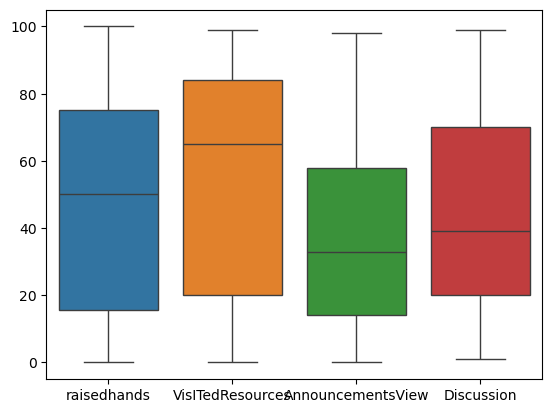

In [14]:
EDA_with_outlier(df)

In [25]:
def Categorical_features(df):
    for col in df.columns:
        if df[col].dtype == 'object':  
            plt.figure(figsize=(8, 6))
            sns.countplot(data=df, x=col)
            plt.title(f"Distribution of {col}")  
            plt.xticks(rotation=45)            
            plt.show()



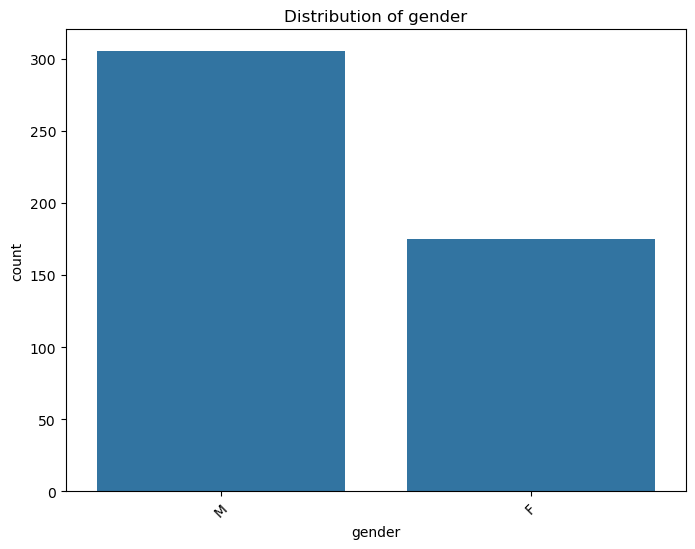

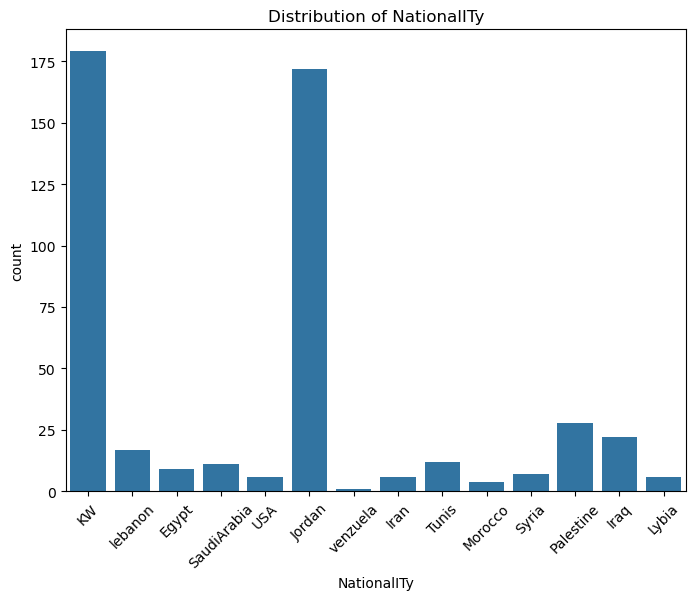

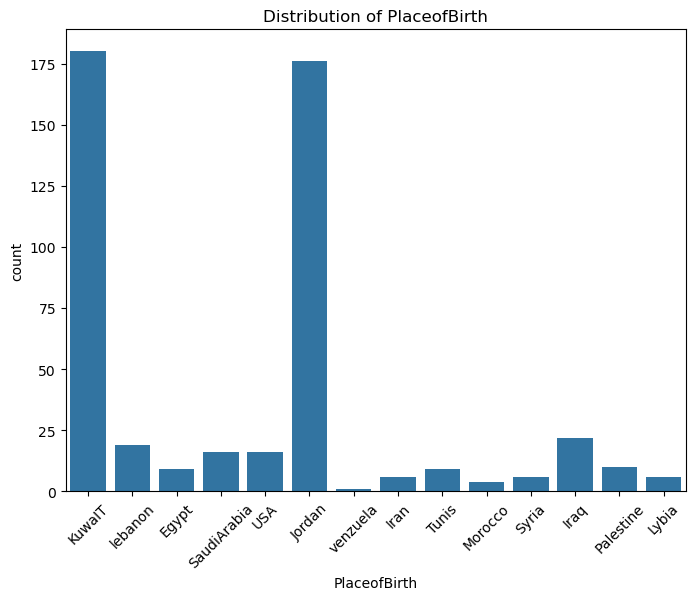

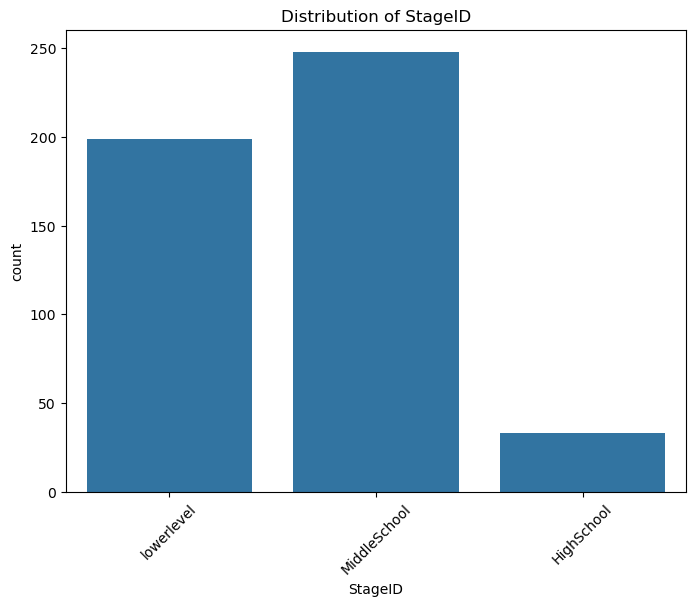

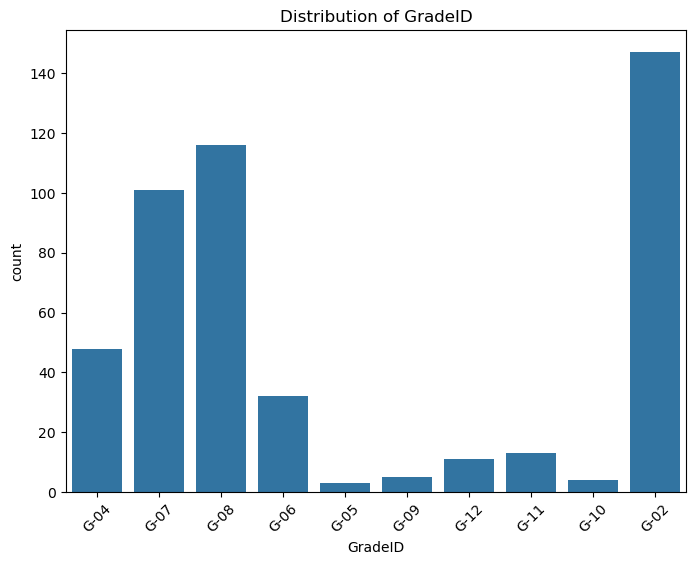

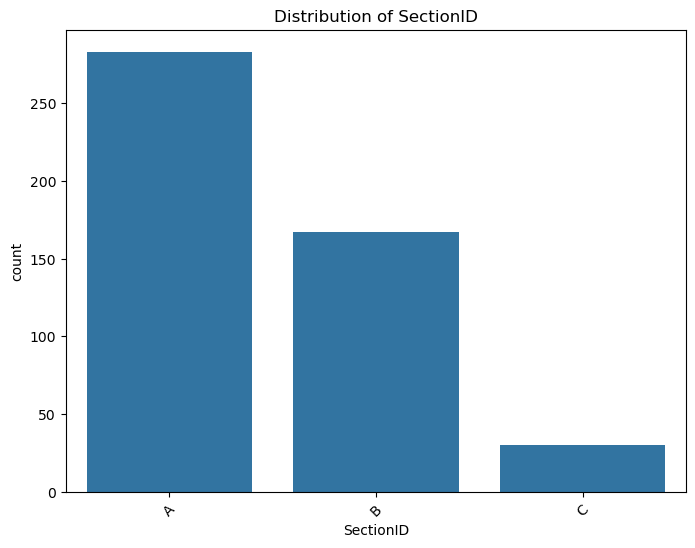

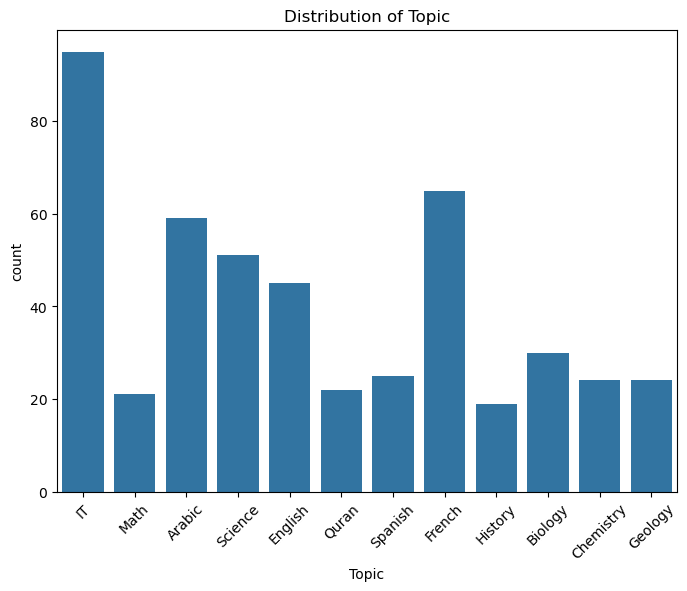

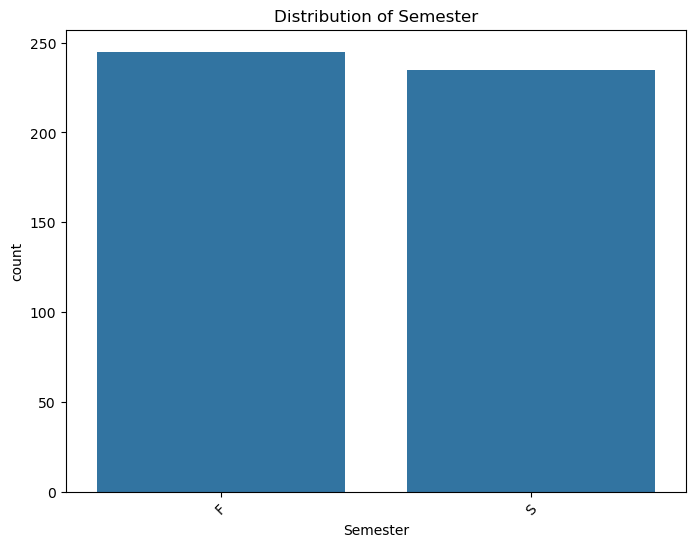

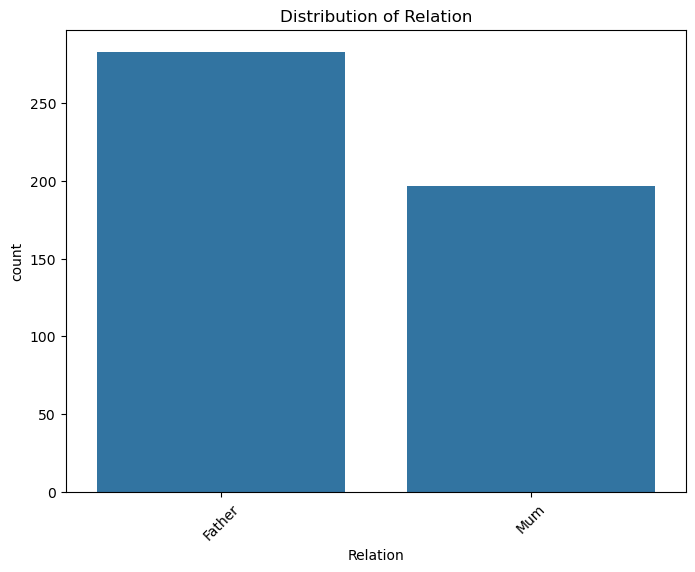

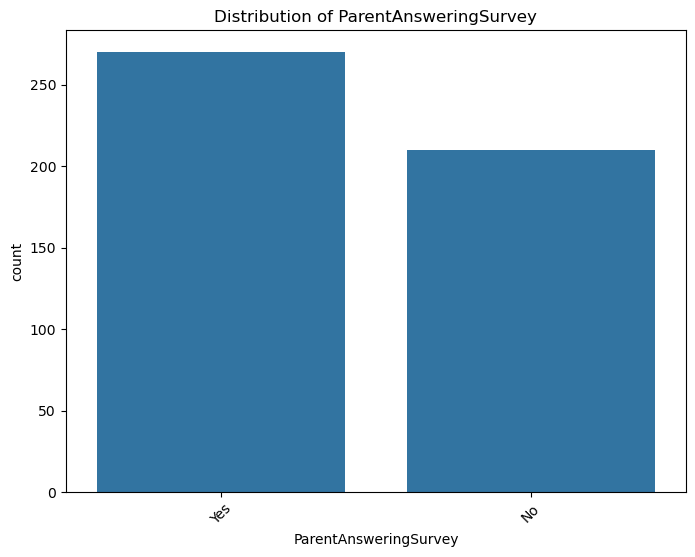

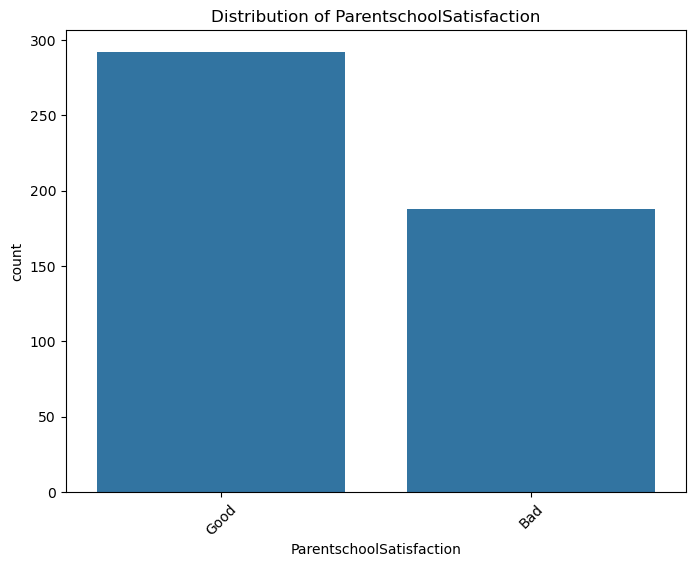

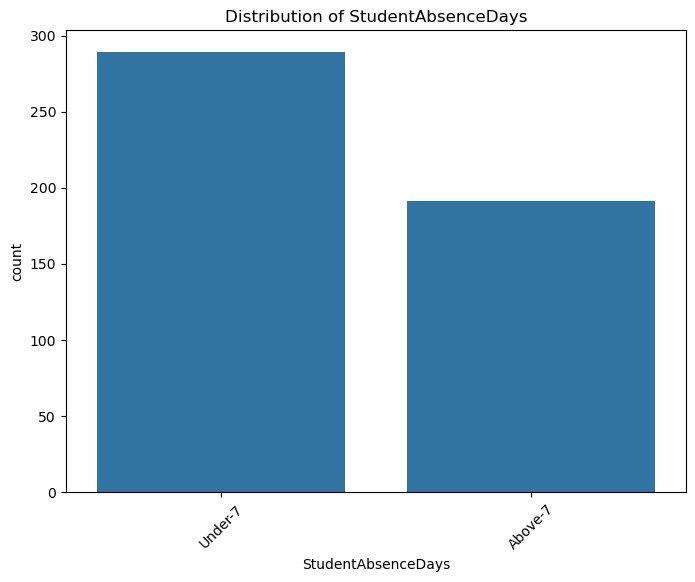

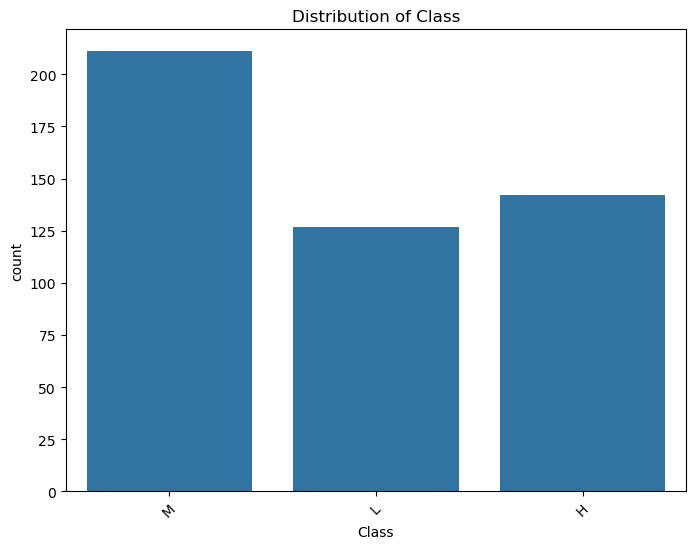

In [27]:
Categorical_features(df)

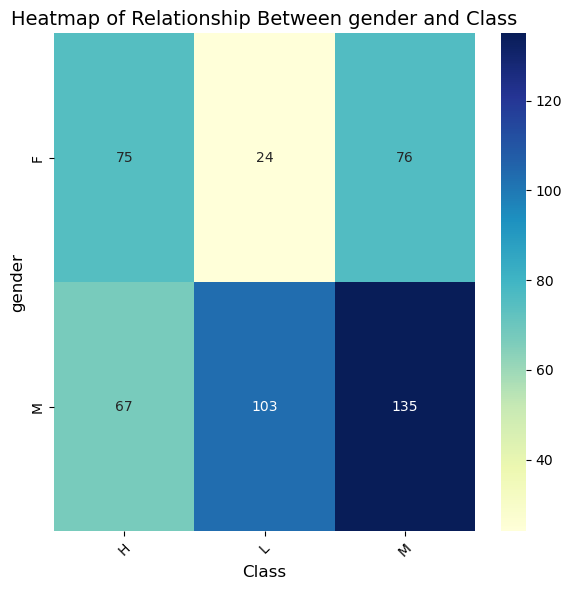

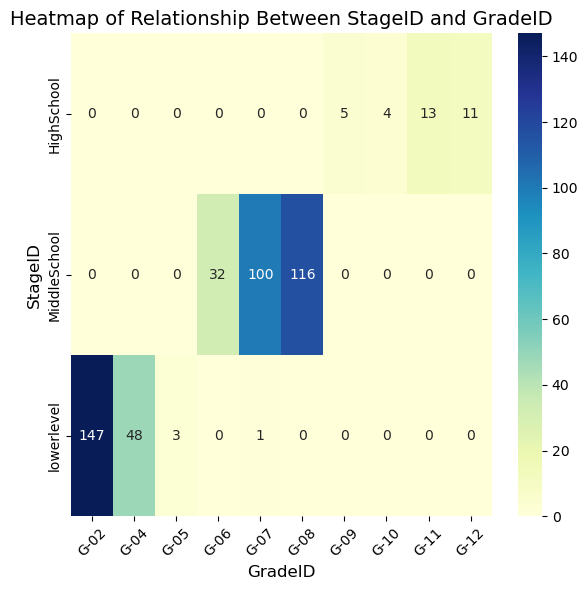

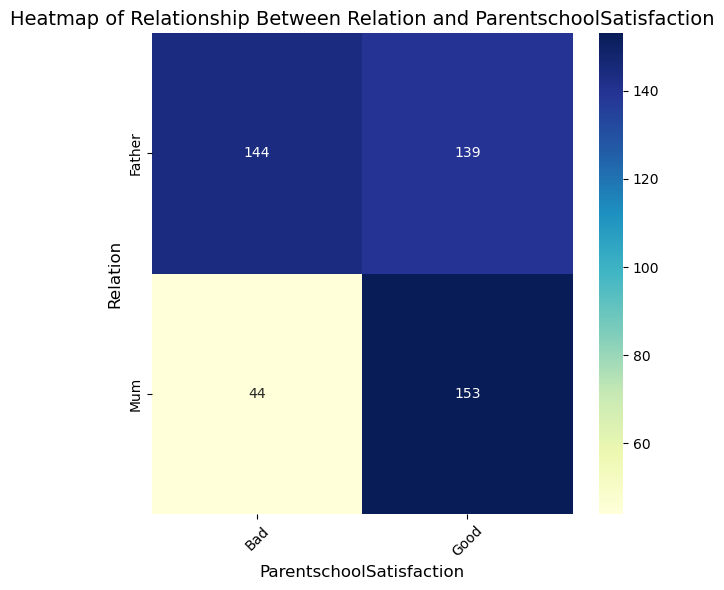

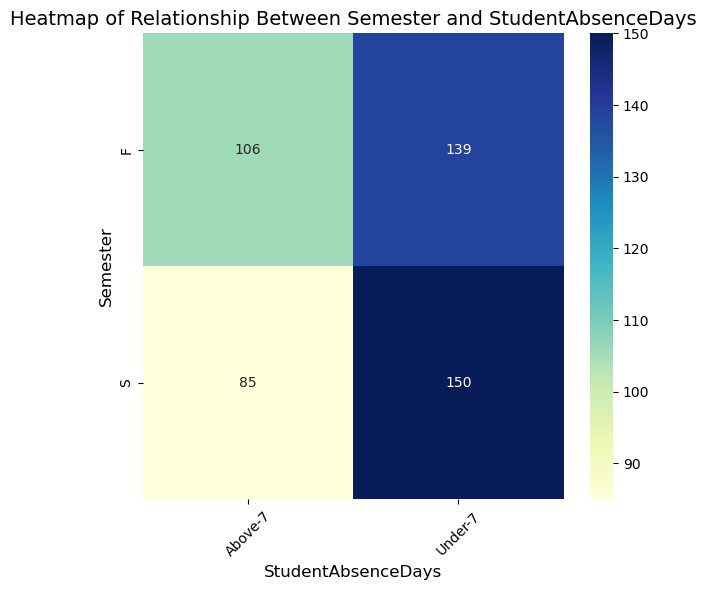

In [28]:
def categorical_relationships_heatmap(data, feature_pairs):
    for feature1, feature2 in feature_pairs:
        crosstab = pd.crosstab(data[feature1], data[feature2])
        plt.figure(figsize=(6, 6))
        sns.heatmap(crosstab, annot=True, cmap="YlGnBu", fmt='d', cbar=True)
        plt.title(f"Heatmap of Relationship Between {feature1} and {feature2}", fontsize=14)
        plt.xlabel(feature2, fontsize=12)
        plt.ylabel(feature1, fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

feature_pairs = [
    ('gender', 'Class'), 
    ('StageID', 'GradeID'), 
    ('Relation', 'ParentschoolSatisfaction'),
    ('Semester', 'StudentAbsenceDays')
]
categorical_relationships_heatmap(df, feature_pairs)


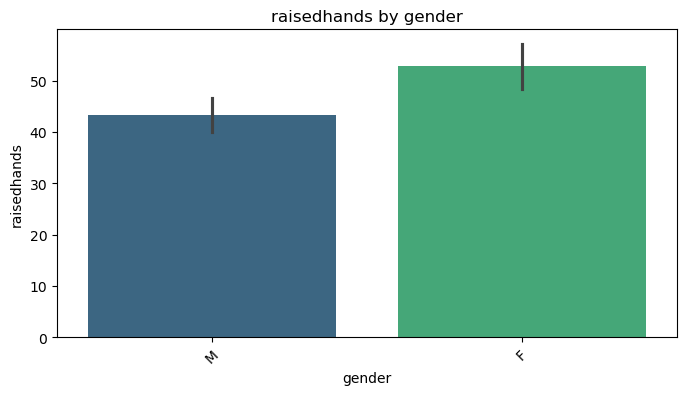

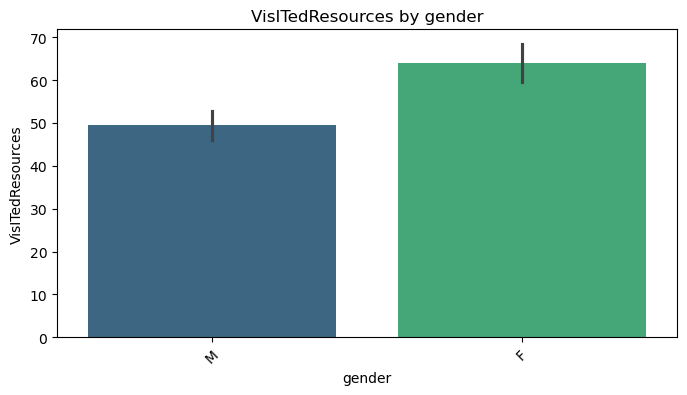

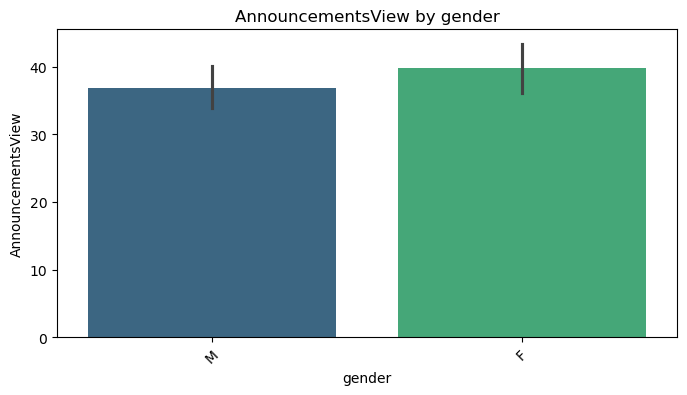

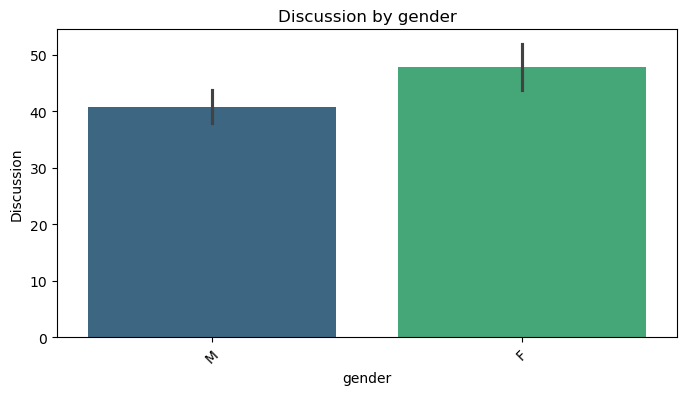

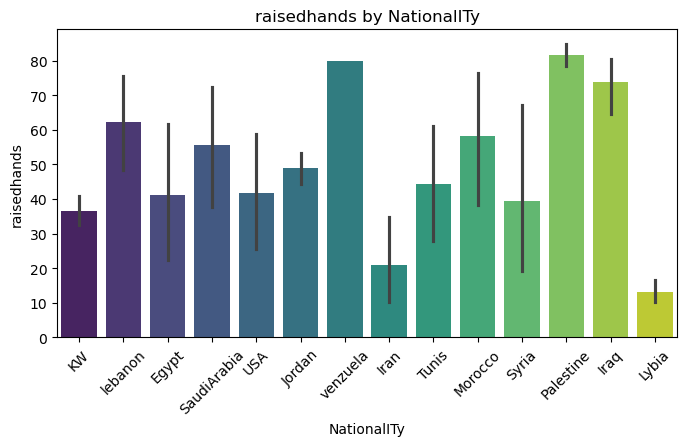

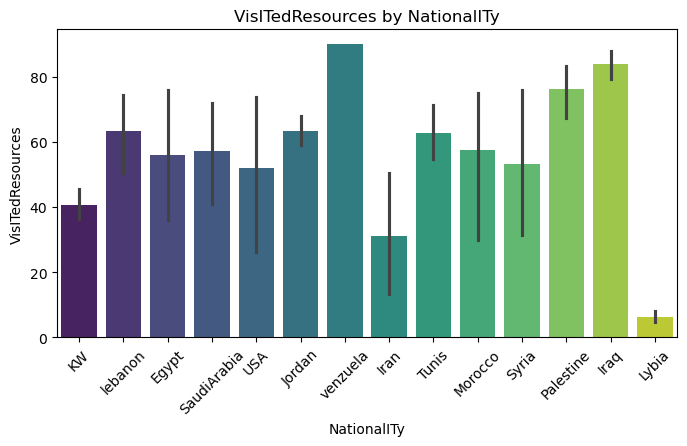

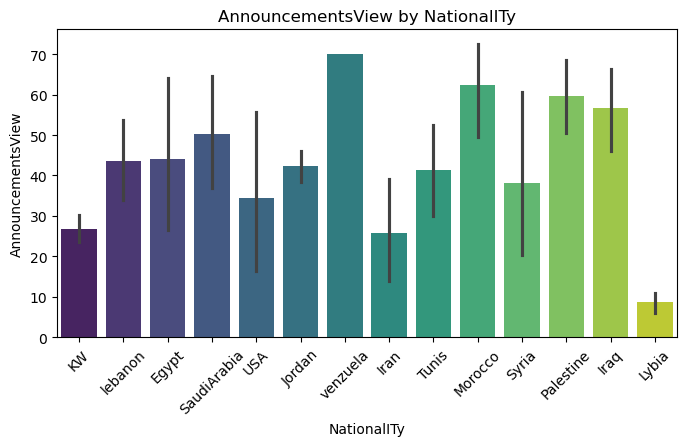

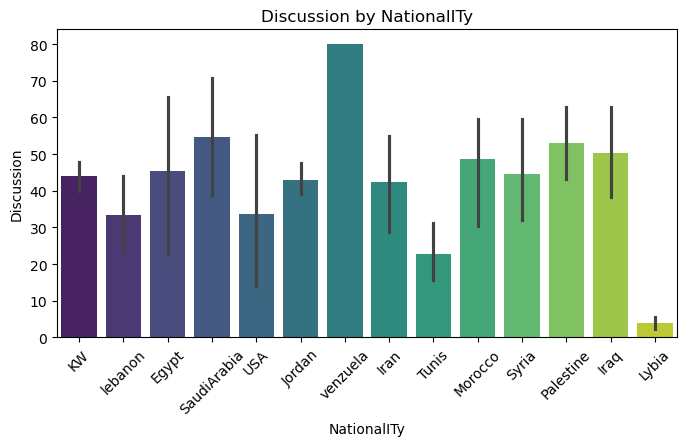

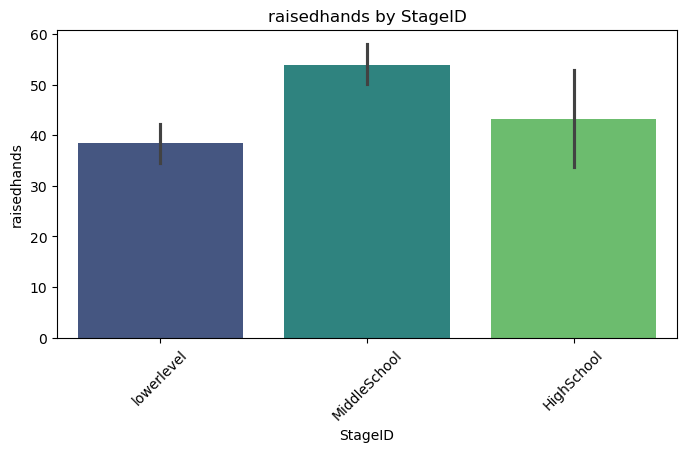

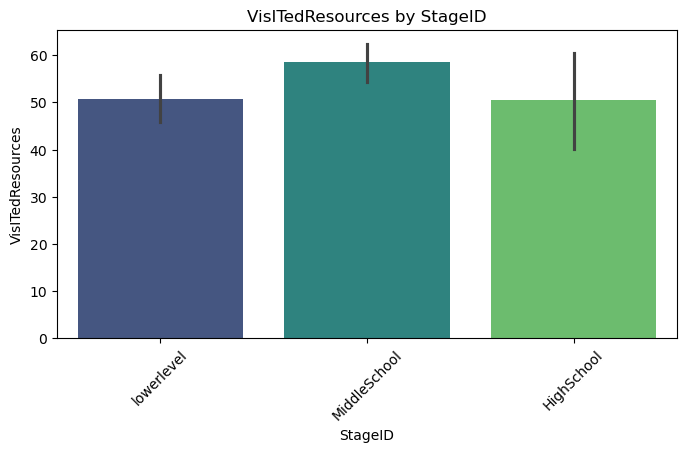

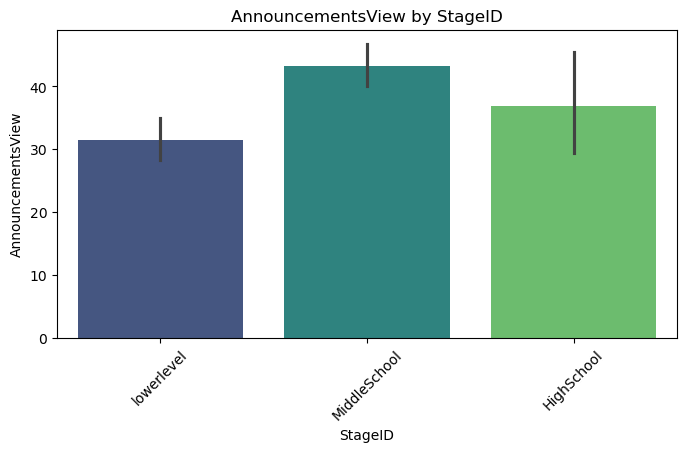

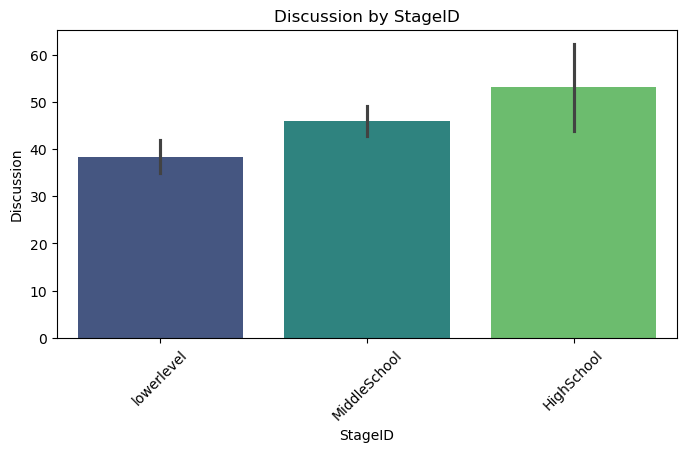

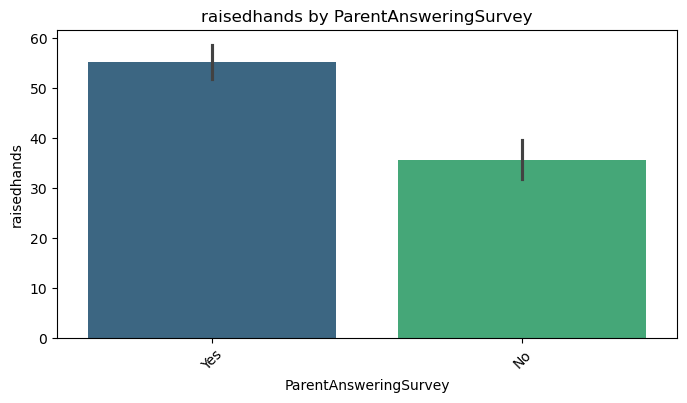

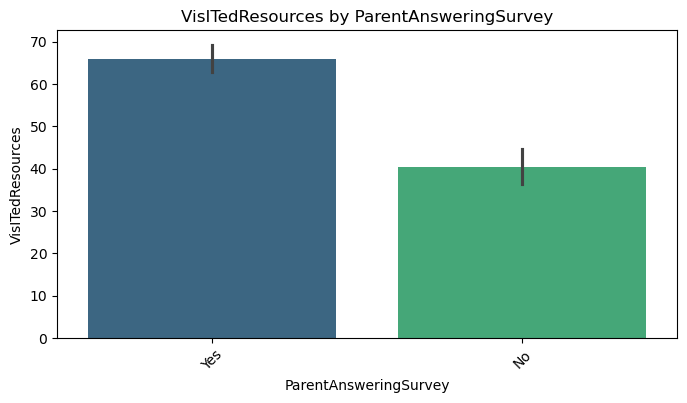

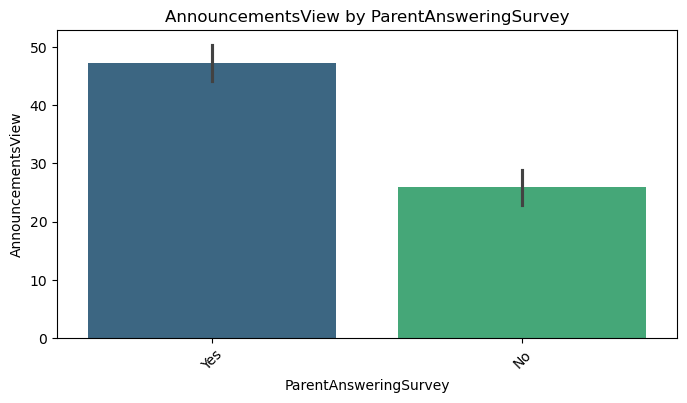

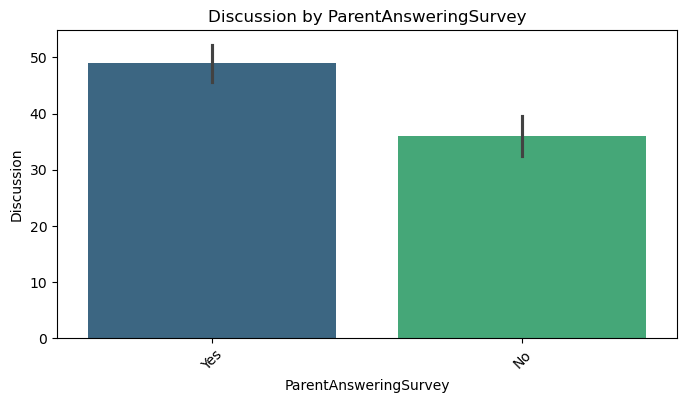

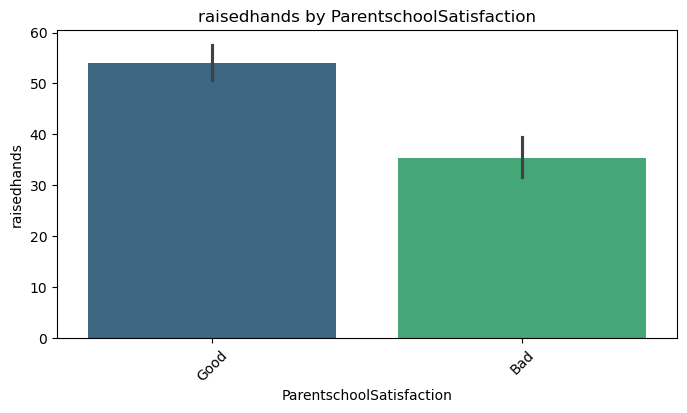

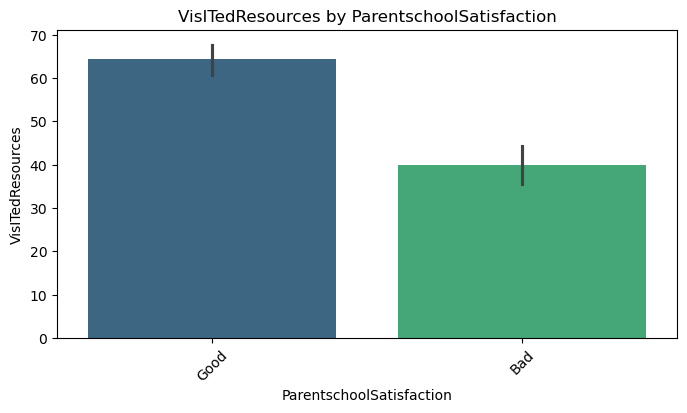

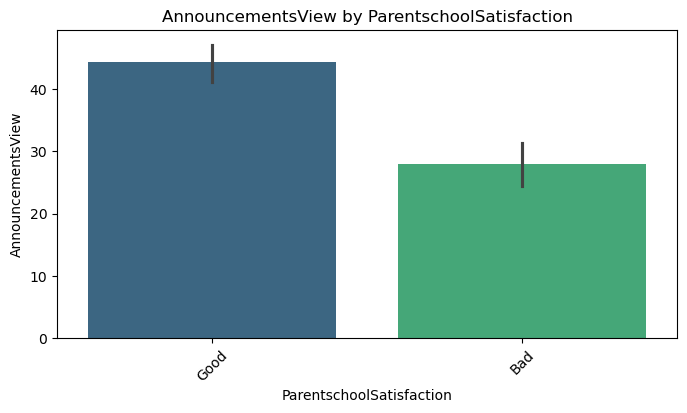

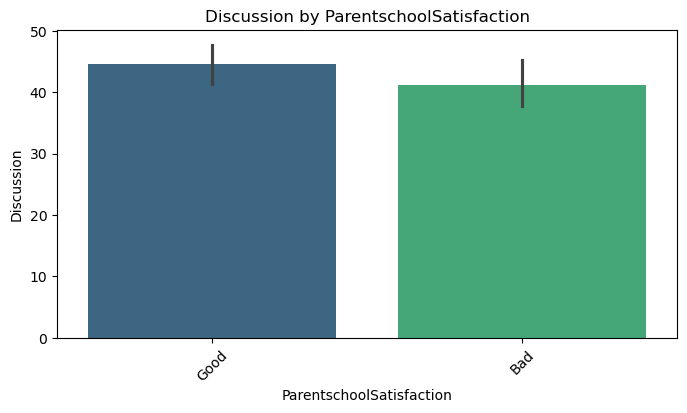

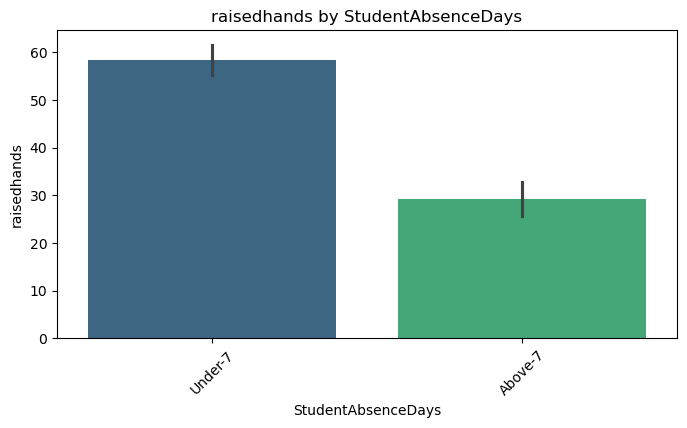

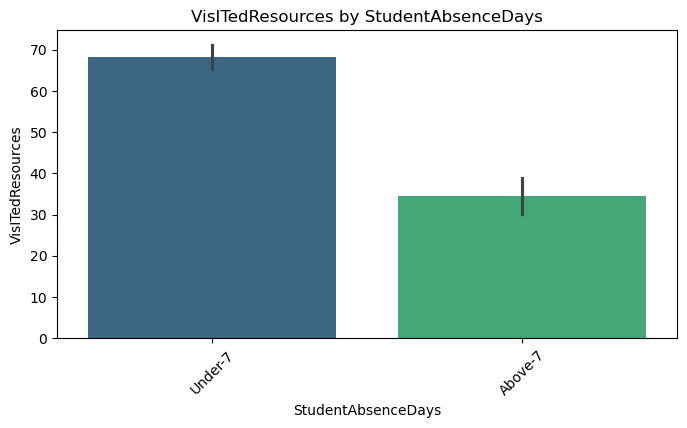

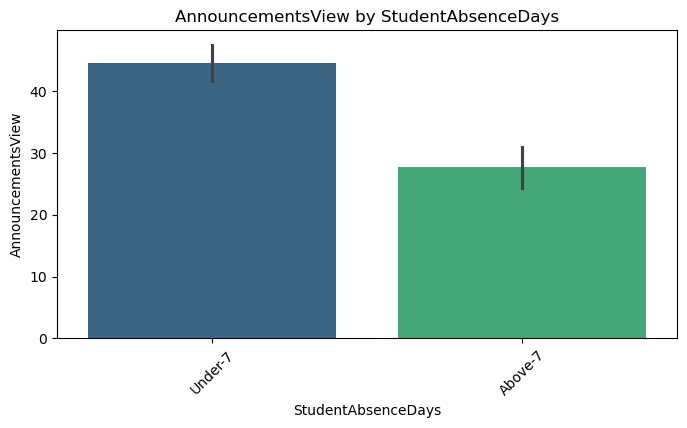

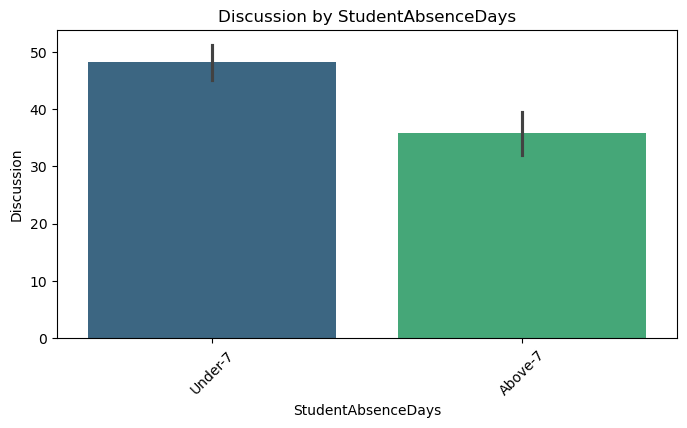

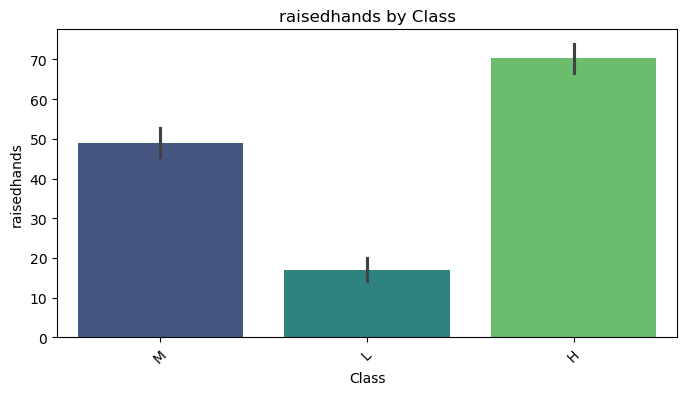

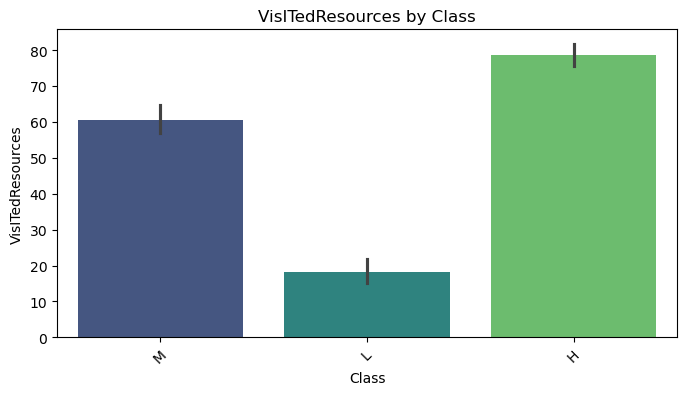

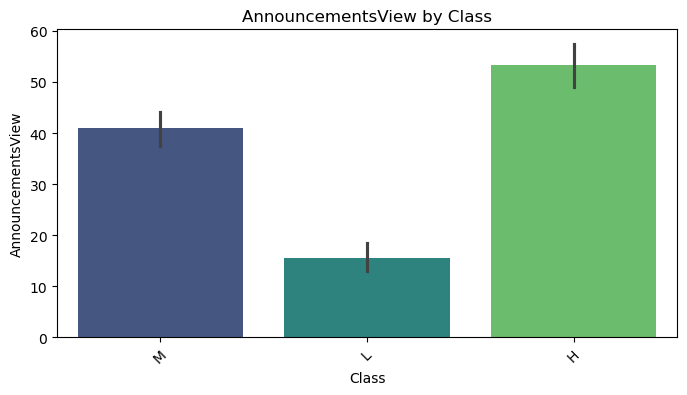

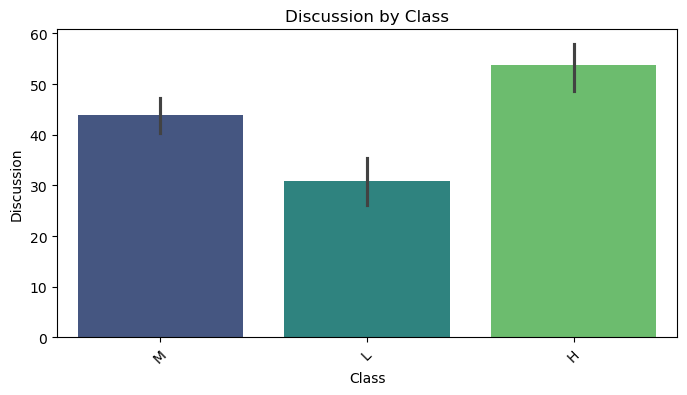

In [17]:
categorical_features = [
    'gender', 'NationalITy', 'StageID', 'ParentAnsweringSurvey',
    'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'
]

numerical_features = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

def visualize_cat_var_with_num_var():
    for cat in categorical_features:
        for num in numerical_features:
            plt.figure(figsize=(8, 4))
            sns.barplot(data=df, x=cat, y=num, palette='viridis')
            plt.title(f'{num} by {cat}')
            plt.xticks(rotation=45)
            plt.show()


visualize_cat_var_with_num_var()

1. Female students are more active in class compared to male students.
2. Female students visit more resources than male students.
3. Students from Libya visit fewer resources, while students from Venezuela visit the most resources.
4. Students from Venezuela are the most active in class discussions.
5. Middle school students participate more in class and visit more resources compared to lower-level and high school students.
6. High school students are more active in class discussions than others.
7. Students who are more active in class and use more resources tend to have parents who are satisfied with the school.
8. Students who are absent for more than 7 days are less active in class and use fewer resources.

* Students who don’t ask questions, use resources, or check announcements often get lower grades.
* Students who miss more than 7 days of school usually get lower grades.
* Students whose parents don’t fill out surveys or are unhappy with them tend to have lower grades.
* Students who don’t join in class discussions often get lower grades

In [18]:
from sklearn.preprocessing import LabelEncoder

def data_preprocess(df):
    numeric_data = df.select_dtypes(include=(np.number))
    category_data = df.select_dtypes(include=('object'))
    category_data = category_data.apply(LabelEncoder().fit_transform)
    combined_data = pd.concat([numeric_data,category_data], axis=1)
    return numeric_data, category_data, combined_data
numeric_data, category_data, combined_data = data_preprocess(df)



In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import GaussianNB

def train_model_with_sampling(data, target_column, n_features=5, test_size=0.20, random_state=36, sampling_method='both'):
    X = data.drop(target_column, axis=1)
    Y = data[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)
    if sampling_method == 'oversample':
        smote = SMOTE(random_state=random_state)
        X_train, y_train = smote.fit_resample(X_train, y_train)
    elif sampling_method == 'undersample':
        rus = RandomUnderSampler(random_state=random_state)
        X_train, y_train = rus.fit_resample(X_train, y_train)
    elif sampling_method == 'both':
        smote = SMOTE(random_state=random_state)
        rus = RandomUnderSampler(random_state=random_state)
        X_train, y_train = smote.fit_resample(X_train, y_train)
        X_train, y_train = rus.fit_resample(X_train, y_train)
    logreg = LogisticRegression(random_state=random_state)
    selector = sfs(logreg, n_features_to_select=n_features, direction='forward', scoring='accuracy')
    selector.fit(X_train, y_train)

    selected_features = selector.get_support(indices=True)
    selected_feature_names = X_train.columns[selected_features]
    X_train_selected = X_train.iloc[:, selected_features]
    X_test_selected = X_test.iloc[:, selected_features]
    
    logreg_model = logreg.fit(X_train_selected, y_train)
    nb_model = GaussianNB()
    nb_model.fit(X_train_selected, y_train)

    return logreg_model, nb_model, selected_feature_names, X_train_selected, X_test_selected, y_train, y_test
logreg_model, nb_model, selected_features, X_train_selected, X_test_selected, y_train, y_test = train_model_with_sampling(
    combined_data, 'Class', sampling_method='both')

print("Selected Features:", selected_features)


Selected Features: Index(['VisITedResources', 'gender', 'Relation', 'ParentAnsweringSurvey',
       'StudentAbsenceDays'],
      dtype='object')


### Prediction on train data

In [20]:
import numpy as np
from sklearn.metrics import classification_report

def train_prediction(df, Model, X_train_selected, y_train):
    training_data = pd.concat([X_train_selected, y_train], axis=1)
    training_data['Bad_Probability'] = Model.predict_proba(X_train_selected)[:, 1]
    training_data['Predicted'] = np.where(training_data['Bad_Probability'] >= 0.7, 1, 0)
    print(classification_report(training_data['Class'], training_data['Predicted']))
    return training_data
training_data_prediction = train_prediction(df, logreg_model, X_train_selected, y_train)


              precision    recall  f1-score   support

           0       0.48      1.00      0.65       170
           1       0.94      0.85      0.89       170
           2       0.00      0.00      0.00       170

    accuracy                           0.62       510
   macro avg       0.47      0.62      0.51       510
weighted avg       0.47      0.62      0.51       510



### Prediction on test data

In [21]:
import numpy as np
from sklearn.metrics import classification_report

def test_prediction(df, Model, X_test_selected, y_test):
    testing_data = pd.concat([X_test_selected, y_test], axis=1)
    testing_data['Bad_Probability'] = Model.predict_proba(X_test_selected)[:, 1]
    testing_data['Predicted'] = np.where(testing_data['Bad_Probability'] >= 0.7, 1, 0)
    print(classification_report(testing_data['Class'], testing_data['Predicted']))
    return testing_data
testing_data_prediction = test_prediction(df, logreg_model, X_test_selected, y_test)


              precision    recall  f1-score   support

           0       0.43      1.00      0.61        30
           1       0.74      0.80      0.77        25
           2       0.00      0.00      0.00        41

    accuracy                           0.52        96
   macro avg       0.39      0.60      0.46        96
weighted avg       0.33      0.52      0.39        96

